# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
#candidateno=277259 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['dreamworks', 'pictures', 'presents', 'a', 'jinks', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [5]:
# 1 a) Answer:-
stop=stopwords.words('english') #stopwords initialisation

def preprocessing_text_data(words_list): # performing text preprocessing pipeline
    post_normalization = [vocab.lower() for vocab in words_list]
    cleaned_data = [vocab for vocab in post_normalization if vocab.isalpha() and vocab not in stop]
    return cleaned_data

train_normalized_data = [(FreqDist(preprocessing_text_data(words_list)),labelled_data) for (words_list,labelled_data) in training_data]
test_normalized_data = [(FreqDist(preprocessing_text_data(words_list)),labelled_data) for (words_list,labelled_data) in testing_data]


positive_freq_dist = FreqDist() #frequency distribution initialisation
negative_freq_dist = FreqDist()

for reviews,labelled_data in train_normalized_data:
    if labelled_data == 'pos':
        positive_freq_dist += reviews
    else:
        negative_freq_dist += reviews

positive_difference = positive_freq_dist - negative_freq_dist
negative_difference = negative_freq_dist - positive_freq_dist

def frequent_occuring_words(positives_frequency, negatives_frequency, topk): #finding out most common words from the data
    difference = positives_frequency - negatives_frequency
    sorted_difference = difference.most_common()
    frequency_vocabs = [vocab for (vocab,frequency) in sorted_difference[:topk]]
    return frequency_vocabs


positive_content_words = frequent_occuring_words(positive_freq_dist, negative_freq_dist, 10) # getting positive words
print("Here, a list of 10 content words which are representative of the positive reviews in my training data:",'\n', positive_content_words)

Here, a list of 10 content words which are representative of the positive reviews in my training data: 
 ['film', 'life', 'story', 'world', 'great', 'also', 'well', 'many', 'best', 'family']


In [6]:
# 1 b) Answer:-

negative_content_words = frequent_occuring_words(negative_freq_dist, positive_freq_dist, 10) # getting negative words
print("Here, a list of 10 content words which are representative of the positive reviews in my training data:",'\n', negative_content_words)

Here, a list of 10 content words which are representative of the positive reviews in my training data: 
 ['movie', 'bad', 'plot', 'worst', 'could', 'even', 'big', 'nothing', 'stupid', 'supposed']


###### 1 c) Explanation:-


+ In the first step, I have created a function named preprocessing_text_data to perform the text preprocessing task, and it is the key step in my procedure. The function takes the list of words as input, converts it into lowercase, removes any non-alphabetic characters present in the data, and also avoids the stop words that are present inside the data. Finally, it produces the cleaned data, which is very essential for the following steps.

+ In the next step, I have applied my function to training and testing data in order to get the data in the proper format. So, here, the function can take the list of words from the train and test data and remain in the data in normalization format. The output of the data is a tuple. I have given two separate variables for training normalization data and testing normalization data.

+ Following that, I initialized the FreqDist function, which can count the frequency of words in a set of data. I have given two variables to differentiate between positive frequency words and negative frequency words.

+ In the final stage, the frequent_occurring_words function can take frequency data as input and remain the top frequency words of a particular section, followed by the sorted_differences function, which gives the data in descending order.

+ The positive_content_words variable and the negative_content_words variable store the values of the top 10 frequently occurring words in the data.



2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [7]:
# 2 a) Answer:-

from nltk.classify.api import ClassifierI
import random
class WordlistClassifier(ClassifierI): # Classifier initialization
    def __init__(self, positive_words, negative_words):
        self._positives = positive_words
        self._negatives = negative_words

    def classify(self, texts): # calculating frequency of words
        current_score = 0
        for vocab,val in texts.items():
            if vocab in self._positives:
                current_score += val
            if vocab in self._negatives:
                current_score -= val
        return "neg" if current_score <0 else "pos"

    def target_labels(self): # output
        return ("pos","neg")

WLclassifier=WordlistClassifier(positive_content_words, negative_content_words)
WLclassifier.classify(FreqDist("The Harry Potter film was good".split()))

'pos'

###### 2 b) Explanation:-


+ Here, imported the necessary NLTK libraries here. WordlistClassifier, a class defined by ClassifierI, was created. When this class is initialized, it takes two parameters, positive_words and negative_words, and stores them as instance variables positives and negatives.

+ Furthermore, a classify function was defined and one parameter was passed as text. This function only accepts data in dictionary format and begins iterating and calculating the score based on the presence of words in the positive and negative data. When a word appears in the positive list, its frequency is added to the current_score; when it appears in the negative list, its frequency is subtracted from the current_score. Finally, if the current_score is less than zero, it returns "neg" otherwise it returns 'pos'.

+ The target_labels function can produce two outputs: 'pos' and 'neg'.

+ Positive_content_words and negative_content_words were used to create WordlistClassifier. The classify method computes the frequency distribution of words in a given comment ("The Harry Potter film was good"). The output ('pos' or 'neg') is generated based on the word list scoring.



3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [8]:
# 3 a) Answer :-

def evaluate_accuracy(model,testing_data):
   count=0
   documents, target_label =zip(*testing_data)
   pred=model.classify_many(documents)
   for voc, val in zip(preds, target_label):
        if voc == val:
           count+=1
   return count/(len(testing_data))

documents, target_label =zip(*test_normalized_data)
preds=WLclassifier.classify_many(documents)
acc_score=evaluate_accuracy(WLclassifier,test_normalized_data)
print('The Accuracy of the data by using World List Classifier is         : ', acc_score)


class confusion_matrix_classification:
  def __init__(self,preds,target_label, targets=("pos","neg")):
    self.positives,self.negatives=targets
    self.True_Pos=0 #truepositive
    self.False_Pos=0 #falsepositive
    self.False_Neg=0 #falsenegative
    self.True_Neg=0 #truenegative
    for h,j in zip(preds,target_label):
      if j==self.positives:
        if h==self.positives:
          self.True_Pos+=1
        else:
          self.False_Neg+=1
      elif h==self.positives:
        self.False_Pos+=1
      else:
        self.True_Neg+=1
  def precision(self):
    prec=0
    prec=self.True_Pos/(self.True_Pos+self.False_Pos)
    return prec
  def recall(self):
    recl=0
    recl=self.True_Pos/(self.True_Pos+self.False_Neg)
    return recl
  def F1(self):
    f_score=(2*self.precision()*self.recall())/(self.precision()+self.recall())
    return f_score

wlc_confusion_matrix=confusion_matrix_classification(preds,target_label)
wlc_precision=wlc_confusion_matrix.precision()
wlc_recall=wlc_confusion_matrix.recall()
wlc_f1_score=wlc_confusion_matrix.F1()


print('The Precision value of the data by using Word List Classifier is  : ', wlc_precision)
print('The recall value of the data by using Word List Classifier is     : ', wlc_recall)
print('The F1 score  of the data by using Word List Classifier is        : ', wlc_f1_score)

The Accuracy of the data by using World List Classifier is         :  0.635
The Precision value of the data by using Word List Classifier is  :  0.5961995249406176
The recall value of the data by using Word List Classifier is     :  0.8366666666666667
The F1 score  of the data by using Word List Classifier is        :  0.6962552011095701


###### 3 b) Explanation:-

+ Formulas for Accuracy, Precision, Recall, and F1 Score:

+ Accuracy = $$\frac{number\; of\;correct\; prediction}{test\; data\; length} $$

+ precision = $$\frac{TP}{TP+FP} $$
+ recall = $$\frac{TP}{TP+FN} $$

+ F1 score = $$\frac{2×p×r}{p+r}$$

+ Yes, it is reasonable to evaluate the classifier in terms of its accuracy when the data is balanced. The balanced data means when the number of observations is the same for all the classes in a given data set. It is a well known metric that provides a simple and straightforward measure of overall model performance.

+ No, it is not reasonable to evaluate the classifier in terms of its accuracy when the data is imbalanced. The imbalanced data means when the number of observations is not the same for all the classes in a given data set. In this scenario, Accuracy does not take cares the types of errors made by the model. It treats all errors the same, irrespective of target output.

+ Counter-example:- Assume a scenario: out of a total of 100 students, 99 arrive on time and one arrives late. The model predicts that all of the students will arrive on time, with a 99 percent accuracy. Due to the imbalance in student numbers, the high accuracy is not the correct accuracy, and it will be unable to detect the small number of truly latecomers. It will be balanced if 50 students arrive on time and 50 arrive late to class out of a class of 100. Alternative evaluation metrics such as precision, recall, and F1 score would be more appropriate in imbalanced cases.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [9]:
# 4 a) Answer:-

from nltk.classify import NaiveBayesClassifier
model_building =NaiveBayesClassifier.train(train_normalized_data)
naive_bayes_predictions = model_building.classify_many(documents)

nbc_confusion_matrix=confusion_matrix_classification(naive_bayes_predictions,target_label)
nbc_precision=nbc_confusion_matrix.precision()
nbc_recall=nbc_confusion_matrix.recall()
nbc_f1_score=nbc_confusion_matrix.F1()
print('The Precision value of the data by using Naive Bayes Classifier Algorithm is  : ', nbc_precision)
print('The recall value of the data by using Naive Bayes Classifier Algorithm is     : ', nbc_recall)
print('The F1 score  of the data by using Naive Bayes Classifier Algorithm is        : ', nbc_f1_score)

compared_precisions= wlc_precision-nbc_precision
compared_recalls=wlc_recall-nbc_recall
compared_f1=wlc_f1_score-nbc_f1_score
data1={"wordlistcalssifier":[wlc_precision, wlc_recall,wlc_f1_score],
     "naivebayesclassifier":[nbc_precision, nbc_recall, nbc_f1_score],
        "compared results ":[compared_precisions,compared_recalls,compared_f1]}



print()# creating space
print('The results of Word List Classifier are :- \nPrecision value : {} \nRecall value : {} \nF1 Score : {}'.format(wlc_precision,wlc_recall,wlc_f1_score))
print()
print()
df1=pd.DataFrame(data1,index=["precision","recall","F1 score"])
df1.head(3)


The Precision value of the data by using Naive Bayes Classifier Algorithm is  :  0.6387665198237885
The recall value of the data by using Naive Bayes Classifier Algorithm is     :  0.9666666666666667
The F1 score  of the data by using Naive Bayes Classifier Algorithm is        :  0.7692307692307693

The results of Word List Classifier are :- 
Precision value : 0.5961995249406176 
Recall value : 0.8366666666666667 
F1 Score : 0.6962552011095701




,wordlistcalssifier,naivebayesclassifier,compared results
precision,0.596200,0.638767,-0.042567
recall,0.836667,0.966667,-0.130000
F1 score,0.696255,0.769231,-0.072976


###### 4 b) Explanation:-



+ I imported the Naive Bayes classifier from the NLTK library. I initialized the classifier and trained the NaiveBayesClassifier by passing the training data. Now my model gets fitted and gives documents in order to make predictions. The predicted values are stored in a separate variable called naive_bayes_predictions.

+ In the next stage, I created confusion_matrix_classification functions to find out the precision, recall, and f1 score of the Naive Bayes classifier, and each of them was stored in a respected variable. and did the comparisons of perception, recall, and f1 score of both the classifiers (word list classifier and Naive Bayes classifier).

+ On the other hand, I created a dictionary that stores all of the values of the word list classifier, NaiveBayesClassifier, and their differences by giving a data1 variable. and displayed all the values in tabular format by using Pandas DataFrame.

+ While comparing the two classifier values, the Naive Bayes classifier gave higher values than the word list classifier. The results of the Word List Classifier were precision 0.59, recall 0.83, and f1 score 0.69, and the results of the Naive Bayes Classifier were precision 0.63, recall 0.96, and f1 score 0.76. Here, the Naive Bayes classifier approach is better with overall performance.



5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [10]:
# 5 a) Answer:-

accuracy=[]
precision=[]
recall=[]
f1_score=[]
for i in range(1,51):
  positive_content_words=[vocab[0] for vocab in positive_difference.most_common(i)]
  negative_content_words=[vocab[0] for vocab in negative_difference.most_common(i)]
  word_list_classifier=WordlistClassifier(positive_content_words,negative_content_words)
  pred_data=word_list_classifier.classify_many(documents)
  accuracy.append(evaluate_accuracy(word_list_classifier,test_normalized_data))
  confusion_matrix_class=confusion_matrix_classification(pred_data, target_label)
  precision.append(confusion_matrix_class.precision())
  recall.append(confusion_matrix_class.recall())
  f1_score.append(confusion_matrix_class.F1())

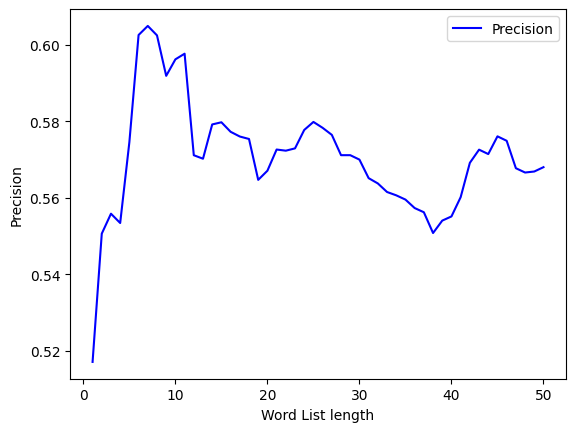

In [11]:
wordlist_freq = list(range(1,51))
plt.plot(wordlist_freq,precision ,'b',label = 'Precision')
plt.xlabel('Word List length')
plt.ylabel('Precision')
plt.legend()
plt.show()

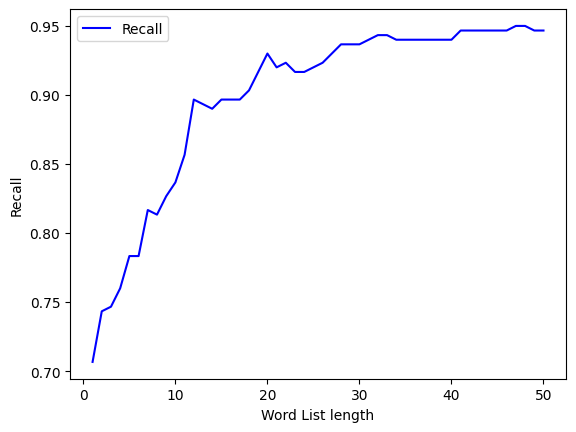

In [12]:
wordlist_length = list(range(1,51))
plt.plot(wordlist_length, recall ,'b',label = 'Recall')
plt.xlabel('Word List length')
plt.ylabel('Recall')
plt.legend()
plt.show()

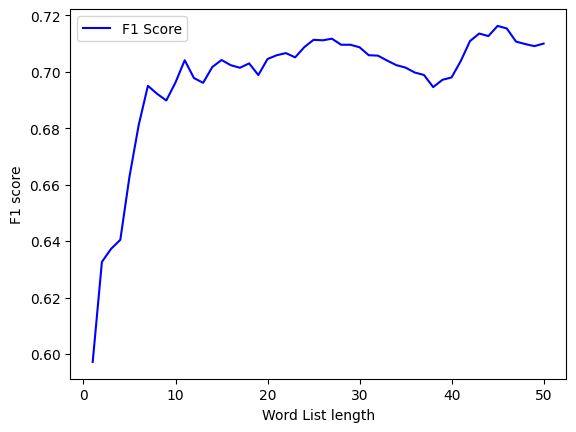

In [13]:
wordlist_length = list(range(1,51))
plt.plot(wordlist_length,f1_score ,'b',label = 'F1 Score')
plt.xlabel('Word List length')
plt.ylabel('F1 score')
plt.legend()
plt.show()

###### 5 a) Answer:-


+ To determine the impact of the length of the wordlists on the wordlist classifier, I used 50 instances of positive and negative wordlists. In the loop, I compute the accuracy by using evaluate_accuracy, precision, recall, and the f1 score by using confusion_matrix_classification. I assigned each value to the variables by creating an empty list variable. Now, all the values will be stored in each of the respective variables.

+ I used the Matplotlib library to plot graphs for precision, recall, and f1 score.
  + The precision chart value starts at 0.52, and it reaches around 0.55. Finally, it reaches approximately 0.60, and the rest of the graph shows a downward trend with fluctuations and ends at 0.57.
  
  + The graph of recalls follows an upward trend; it started at 0.71 and reaches 0.95 with slight changes in trend.
  
  + The F1 score graph starts at 0.60, rapidly hits the point around 0.70, and it follows the straight forward direction with less changes in the trend line with respect to the word length and remains at 0.71.

  
  
 ###### 5 b) Answer:-

+ The word list classifiers are easier to understand, and it's very clearer how classification decisions are made based on the presence or absence of a specific vocabulary, but they might face difficulty when dealing with new data.

+ The application of the Naive Bayes classifier is very simple, and it is a probability-based approach. It can easily deal with the new complex data. In the above scenario, I have also seen the performance of both classifiers. The Naive Bayes classifier performed very well, with higher accuracy, precision, recall, and f1 score.

+ In my future work in this area, I will prefer and recommend the Naive Bayes classifier over the word list classifier.


In [14]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

<ipython-input-14-9ea4abea94eb>:4: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current


Mounted at /content/drive
Submission length is 1179
